In [3]:
import torch
import torchvision
import pandas as pd

import os
import glob
from services.service import visualize, get_label
from services.augmentations import get_val_augmentation, get_infer_augmentation
from services.model import FasterRCNN, DetectionDataset, InferImages, collate_fn


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


In [4]:
list_train = glob.glob('../FullIJCNN2013' + '/*')
list_train = [string.split('/')[-1] for string in list_train if '.ppm' in string]


In [5]:
n_classes = 5
det_model = FasterRCNN(n_classes)
det_model = det_model.load_from_checkpoint(
    checkpoint_path='../lightning_logs/detection/3class_v1/epoch=88-step=4984.ckpt', n_classes=n_classes)
det_model = det_model.to('cpu')


In [6]:
data = pd.read_csv('../FullIJCNN2013/gt.txt', sep=';', header=None)
data.rename(columns={0: "image", 5: "class"}, inplace=True)
data_for_split = data['image'].unique()
data['class'] = data['class'].apply(get_label)

names = data['image'].unique()


In [7]:
data.head()


image    1    2     3    4  class
0  00000.ppm  774  411   815  446      3
1  00001.ppm  983  388  1024  432      2
2  00001.ppm  386  494   442  552      2
3  00001.ppm  973  335  1031  390      3
4  00002.ppm  892  476  1006  592      2

In [8]:
transform = get_val_augmentation()
eval_set = DetectionDataset(data, names, '../FullIJCNN2013',
                            transform
                            )

eval_loader = torch.utils.data.DataLoader(
    eval_set, batch_size=1, num_workers=4, collate_fn=collate_fn,
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


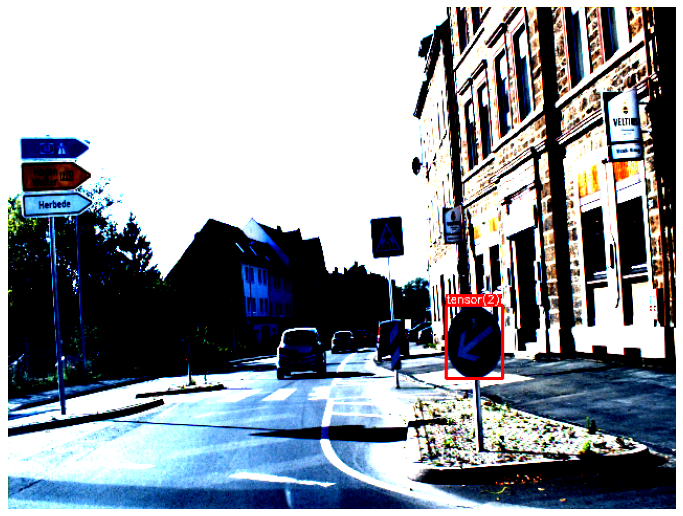

In [9]:
im, targets = eval_set[2]
visualize(im.permute(1, 2, 0).numpy(), targets['boxes'], targets['labels'])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

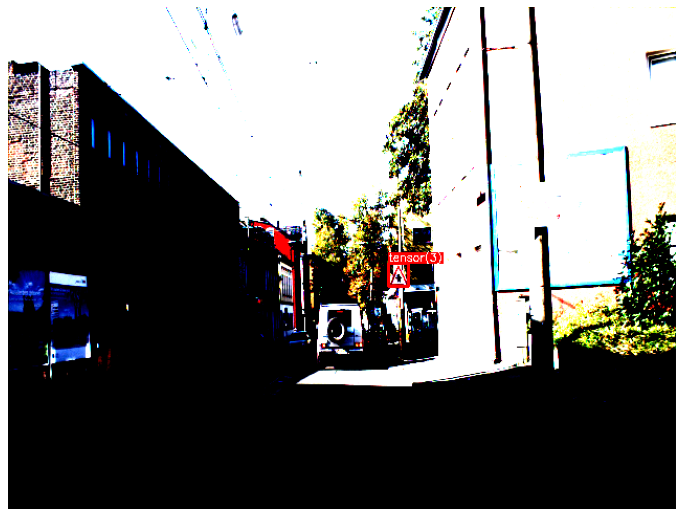

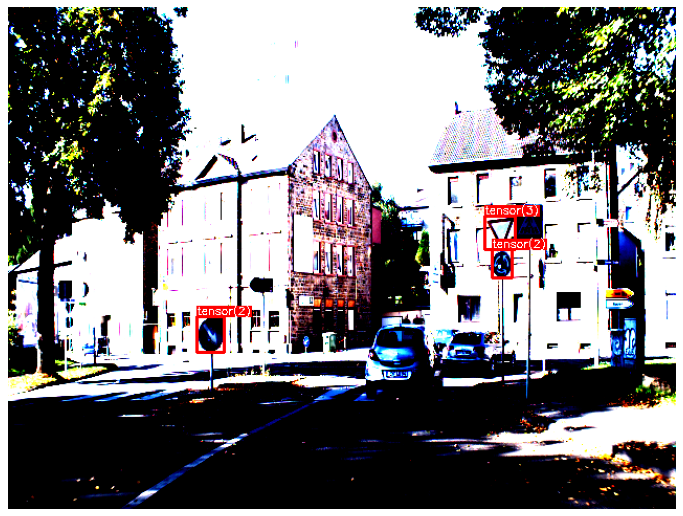

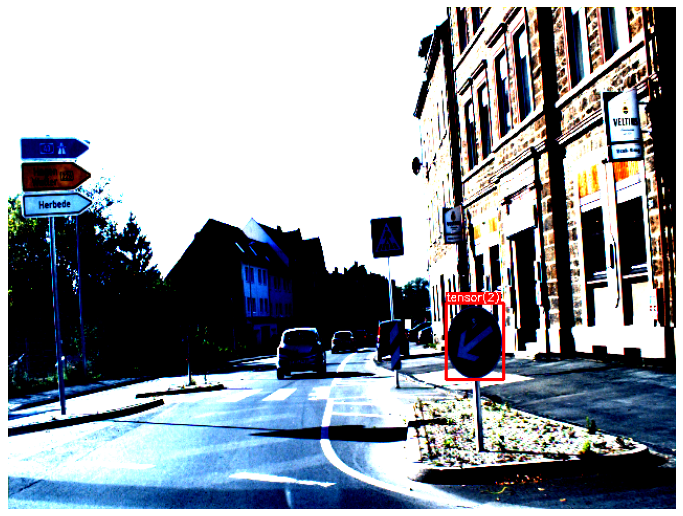

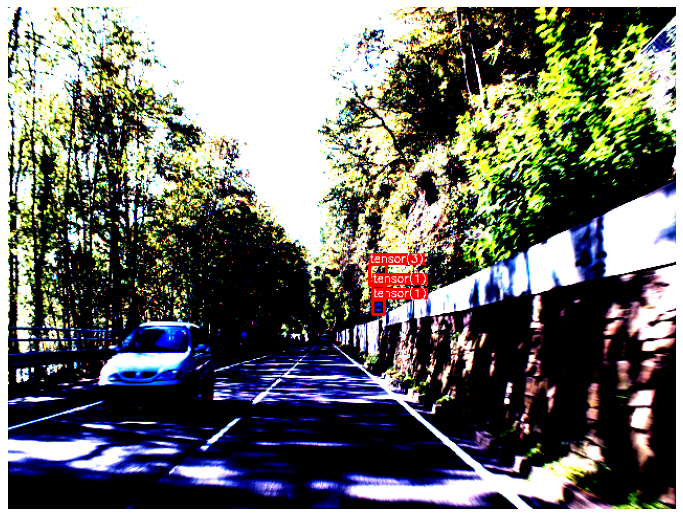

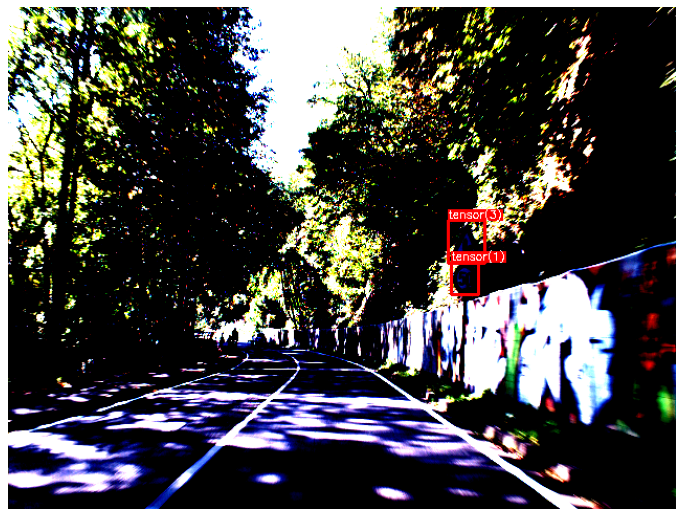

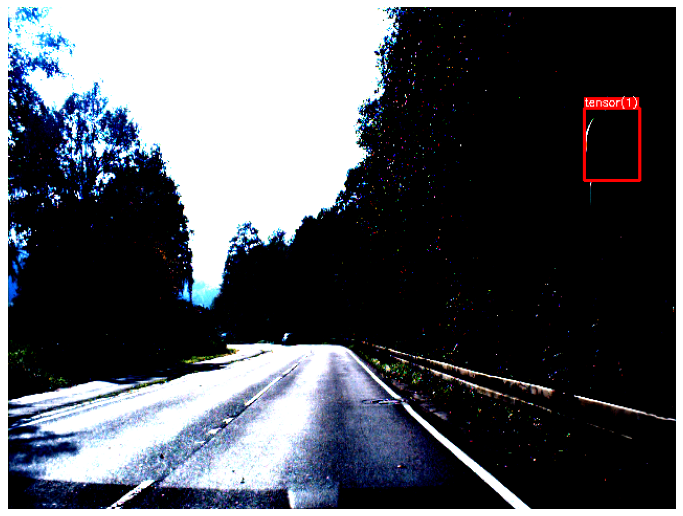

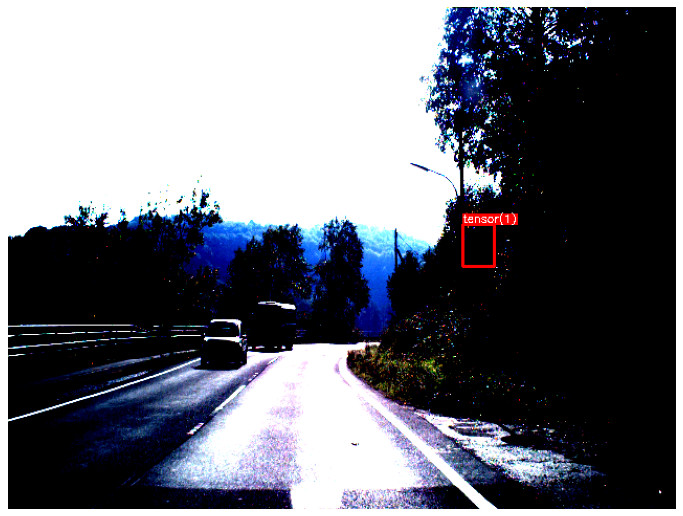

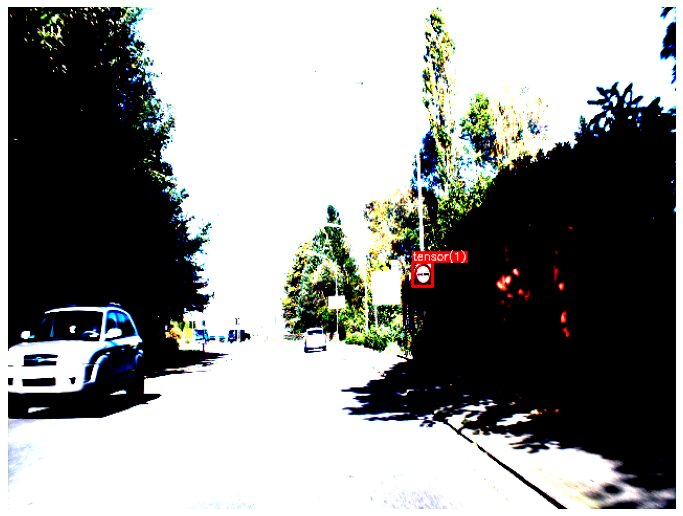

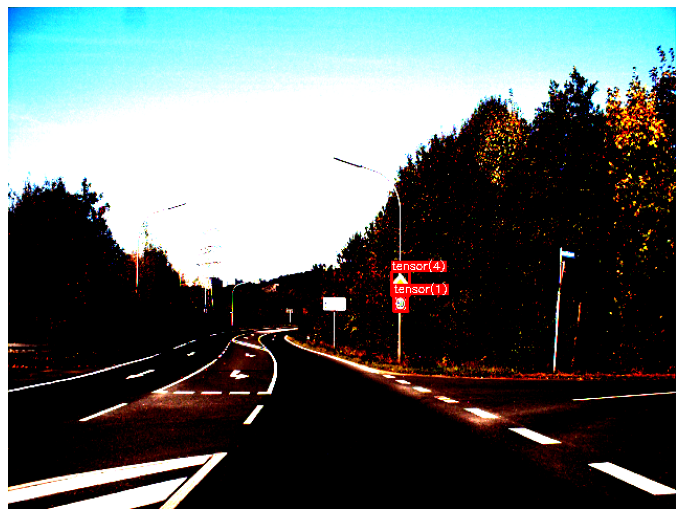

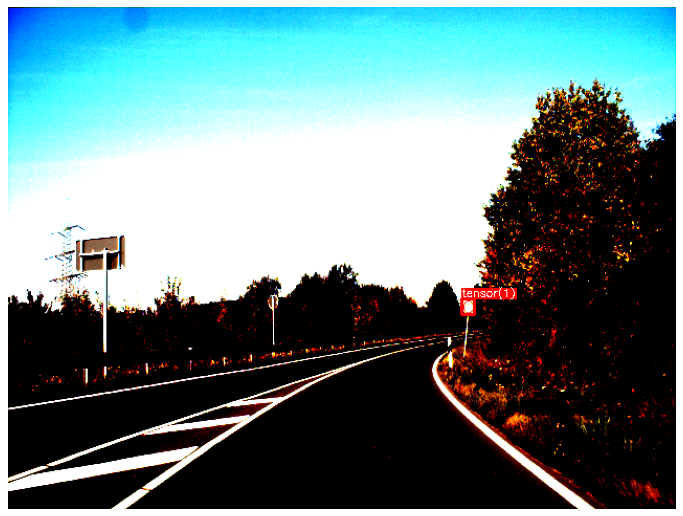

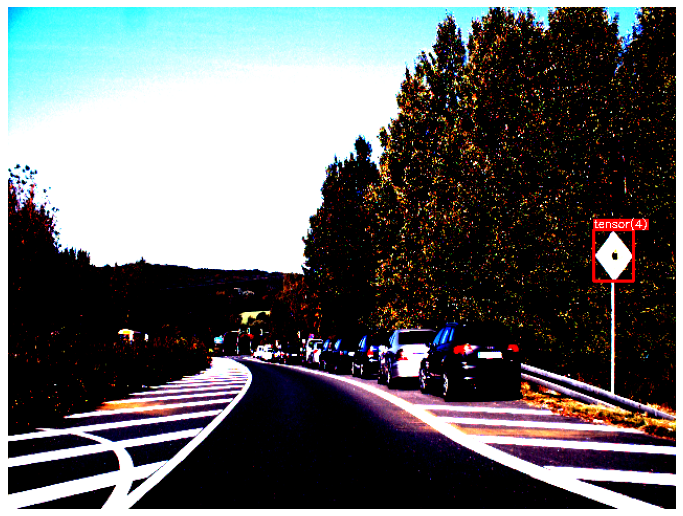

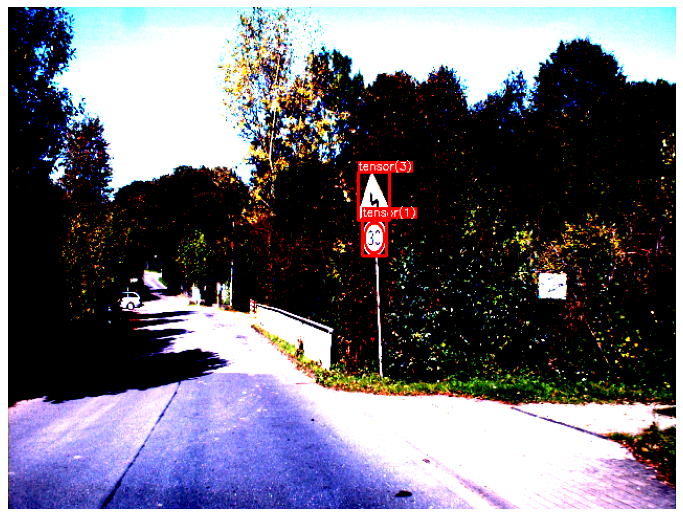

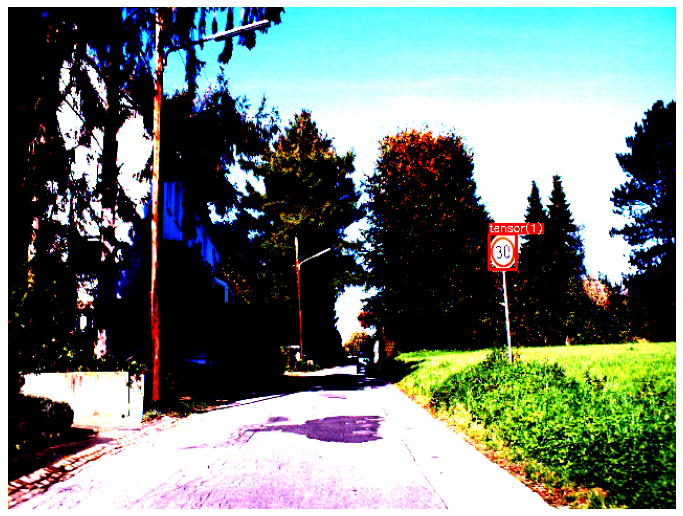

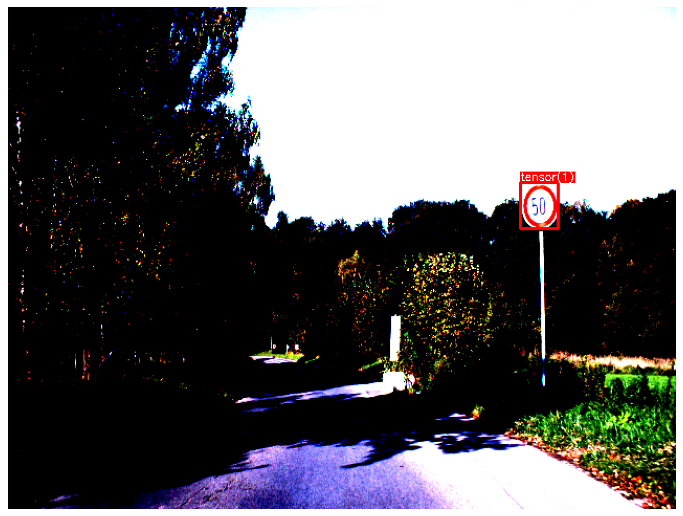

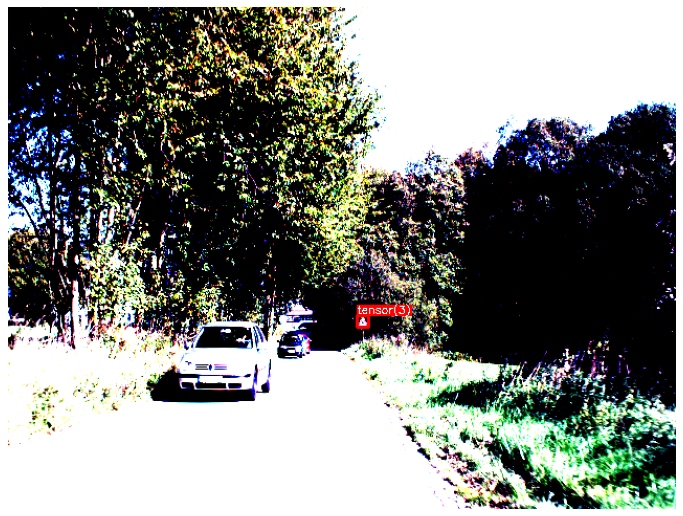

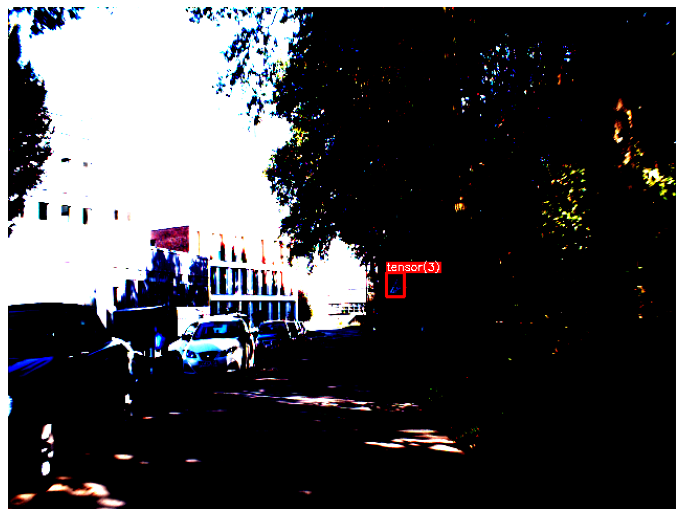

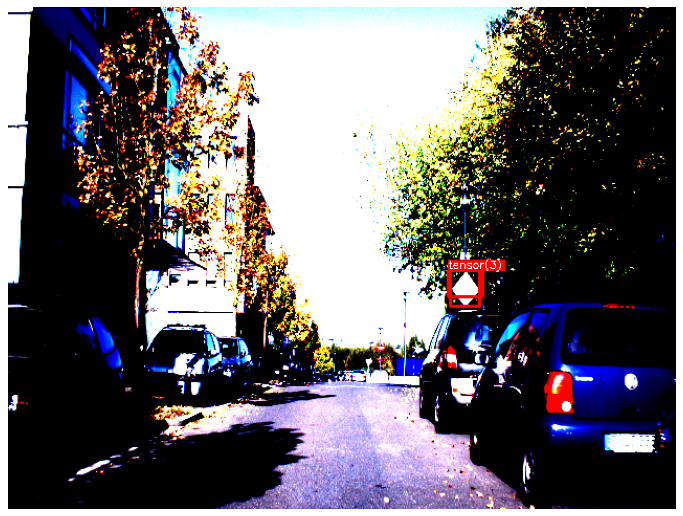

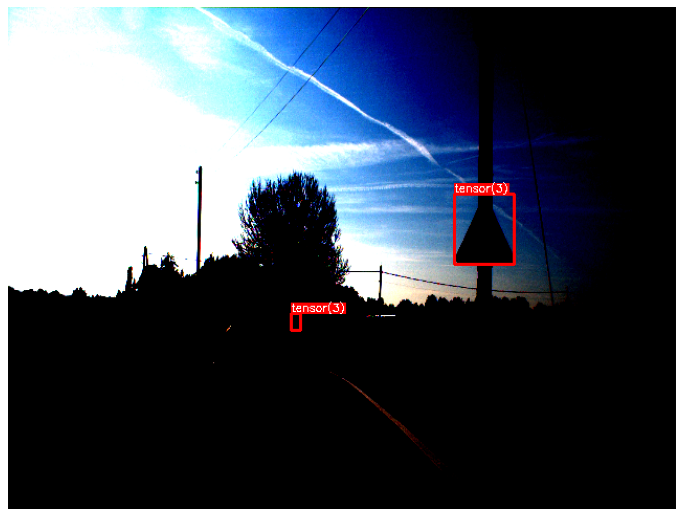

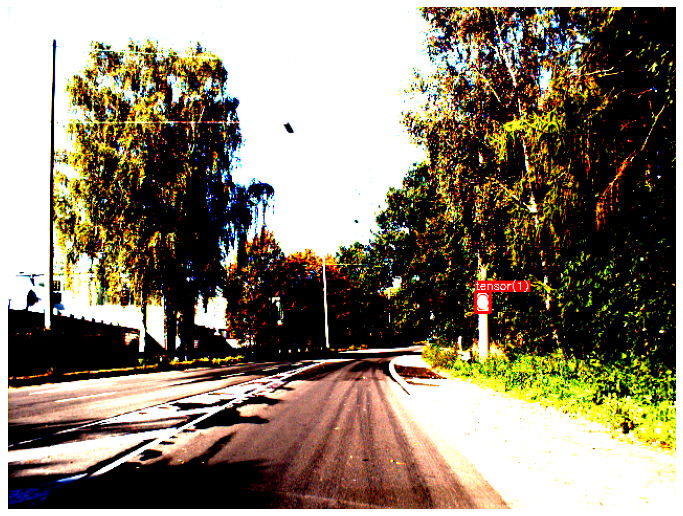

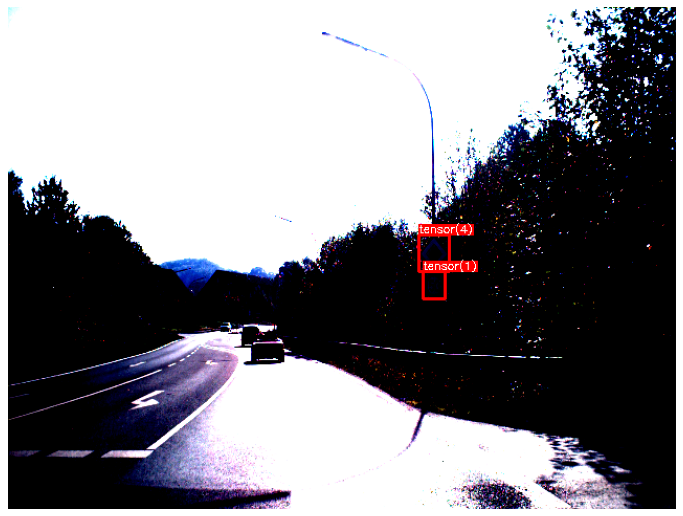

In [130]:
i = 0
for images, target in eval_loader:
    j = 0
    out = det_model(images)
    visualize(images[j].permute(1, 2, 0).numpy(), out[j]['boxes'][:3], out[j]['labels'][:3])
    i += 1
    if i >= 20:
        break
